In [ ]:
import pandas as pd # loading the data and cleaning it
import numpy as np # mathematical calculation
import seaborn as sns # data visualization
import matplotlib.pyplot as plt  # data visualization
from sklearn.preprocessing import LabelEncoder # scikit-learn
from sklearn.utils import resample

In [ ]:
data=pd.read_csv("/content/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Pricey,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73.0,11,276.0,-120,Bad,42,17,Yes,Yes
1,11.22,111.0,48.0,16,260.0,83,Good,65,10,Yes,Yes
2,10.06,113.0,35.0,10,269.0,80,Medium,59,12,Yes,Yes
3,7.40,117.0,100.0,4,466.0,97,Medium,55,14,Yes,Yes
4,4.15,141.0,64.0,-,340.0,128,Ba,38,13,Yes,No


In [ ]:
data.shape

(401, 11)

In [ ]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Pricey',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
data.columns.tolist()

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Pricey',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
data.dtypes #64bits (quantization)

,0
Sales,float64
CompPrice,float64
Income,float64
Advertising,object
Population,float64
Pricey,int64
ShelveLoc,object
Age,int64
Education,int64
Urban,object


In [ ]:
data.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Pricey,ShelveLoc,Age,Education,Urban,US
391,5.47,108.0,75.0,9,61.0,111,Medium,67,12,Yes,Yes
392,6.10,153.0,63.0,0,49.0,124,Bad,56,16,Yes,No
393,4.53,129.0,42.0,13,315.0,130,Bad,34,13,Yes,Yes
394,5.57,109.0,51.0,10,26.0,120,Medium,30,17,No,Yes
395,5.35,130.0,58.0,19,366.0,139,Bad,33,16,Yes,Yes
396,12.57,138.0,108.0,17,203.0,128,Good,33,14,Yes,Yes
397,6.14,139.0,23.0,3,37.0,120,Medium,55,11,No,Yes
398,7.41,162.0,26.0,12,368.0,159,Medium,40,18,Yes,Yes
399,5.94,100.0,79.0,7,284.0,95,Bad,50,12,Yes,Yes
400,9.71,134.0,37.0,0,27.0,120,Good,49,16,Yes,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        399 non-null    float64
 1   CompPrice    398 non-null    float64
 2   Income       399 non-null    float64
 3   Advertising  400 non-null    object 
 4   Population   399 non-null    float64
 5   Pricey       401 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          401 non-null    int64  
 8   Education    401 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           401 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 34.6+ KB


IQR=Third quartile- first quartile

In [ ]:
data.describe(include="object")

,Advertising,ShelveLoc,Urban,US
count,400,400,400,401
unique,29,5,2,2
top,0,Medium,Yes,Yes
freq,145,220,282,259


In [ ]:
data.describe(include="all")

,Sales,CompPrice,Income,Advertising,Population,Pricey,ShelveLoc,Age,Education,Urban,US
count,399.000000,398.000000,399.000000,400,399.000000,401.000000,400,401.000000,401.000000,400,401
unique,NaN,NaN,NaN,29,NaN,NaN,5,NaN,NaN,2,2
top,NaN,NaN,NaN,0,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,145,NaN,NaN,220,NaN,NaN,282,259
mean,7.468471,124.949749,68.736842,NaN,265.175439,115.216958,NaN,53.379052,13.907731,NaN,NaN
std,2.815461,15.368275,28.105391,NaN,147.408499,26.419128,NaN,16.219617,2.621825,NaN,NaN
min,0.000000,77.000000,21.000000,NaN,10.000000,-120.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.360000,115.000000,42.500000,NaN,139.500000,100.000000,NaN,40.000000,12.000000,NaN,NaN
50%,7.450000,124.500000,69.000000,NaN,272.000000,117.000000,NaN,55.000000,14.000000,NaN,NaN
75%,9.315000,135.000000,91.000000,NaN,399.000000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,399.0,7.468471,2.815461,0.0,5.36,7.45,9.315,16.27
CompPrice,398.0,124.949749,15.368275,77.0,115.00,124.50,135.000,175.00
Income,399.0,68.736842,28.105391,21.0,42.50,69.00,91.000,120.00
Population,399.0,265.175439,147.408499,10.0,139.50,272.00,399.000,509.00
Pricey,401.0,115.216958,26.419128,-120.0,100.00,117.00,131.000,191.00
Age,401.0,53.379052,16.219617,25.0,40.00,55.00,66.000,80.00
Education,401.0,13.907731,2.621825,10.0,12.00,14.00,16.000,18.00


In [ ]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Pricey,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73.0,11,276.0,-120,Bad,42,17,Yes,Yes
1,11.22,111.0,48.0,16,260.0,83,Good,65,10,Yes,Yes
2,10.06,113.0,35.0,10,269.0,80,Medium,59,12,Yes,Yes
3,7.40,117.0,100.0,4,466.0,97,Medium,55,14,Yes,Yes
4,4.15,141.0,64.0,-,340.0,128,Ba,38,13,Yes,No


In [ ]:
data.dtypes

,0
Sales,float64
CompPrice,float64
Income,float64
Advertising,object
Population,float64
Pricey,int64
ShelveLoc,object
Age,int64
Education,int64
Urban,object


In [ ]:
df.shape

(401, 11)

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Pricey',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        399 non-null    float64
 1   CompPrice    398 non-null    float64
 2   Income       399 non-null    float64
 3   Advertising  400 non-null    object 
 4   Population   399 non-null    float64
 5   Pricey       401 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          401 non-null    int64  
 8   Education    401 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           401 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 34.6+ KB


# Check for incorrect data types

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Pricey,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73.0,11,276.0,-120,Bad,42,17,Yes,Yes
1,11.22,111.0,48.0,16,260.0,83,Good,65,10,Yes,Yes
2,10.06,113.0,35.0,10,269.0,80,Medium,59,12,Yes,Yes
3,7.40,117.0,100.0,4,466.0,97,Medium,55,14,Yes,Yes
4,4.15,141.0,64.0,-,340.0,128,Ba,38,13,Yes,No


In [ ]:
df.dtypes

,0
Sales,float64
CompPrice,float64
Income,float64
Advertising,object
Population,float64
Pricey,int64
ShelveLoc,object
Age,int64
Education,int64
Urban,object


In [ ]:
# Now open your dataset manually and look for what causing it is showing object
# column for Advertising
# in my case one value is "-" types

df['Advertising'] = df.Advertising.replace('-', np.nan)
df['Advertising'] = pd.to_numeric(df['Advertising'])

In [ ]:
df.dtypes

,0
Sales,float64
CompPrice,float64
Income,float64
Advertising,float64
Population,float64
Pricey,int64
ShelveLoc,object
Age,int64
Education,int64
Urban,object


# Checking and Fixing spelling error in column names

In [ ]:
# checking for column name spelling error
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Pricey',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
df.rename(columns={"Pricey": "Price"}, inplace=True)

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

# Checking and fixing spelling errors in categorical column

In [ ]:
object_cols = df.select_dtypes(include='object').columns #numeric,int,float

In [ ]:
object_cols

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [ ]:
for col in object_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for ShelveLoc:
ShelveLoc
Medium    220
Bad        95
Good       83
Ba          1
Goo         1
Name: count, dtype: int64

Value counts for Urban:
Urban
Yes    282
No     118
Name: count, dtype: int64

Value counts for US:
US
Yes    259
No     142
Name: count, dtype: int64



In [ ]:
df['ShelveLoc'] = df['ShelveLoc'].replace({'Ba': 'Bad', 'Goo': 'Good'})

In [ ]:
for col in object_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for ShelveLoc:
ShelveLoc
Medium    220
Bad        96
Good       84
Name: count, dtype: int64

Value counts for Urban:
Urban
Yes    282
No     118
Name: count, dtype: int64

Value counts for US:
US
Yes    259
No     142
Name: count, dtype: int64



# Checking for negative values

In [ ]:
df.describe() #Look at min it will give you info about negative values

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,399.000000,398.000000,399.000000,399.000000,399.000000,401.000000,401.000000,401.000000
mean,7.468471,124.949749,68.736842,6.611529,265.175439,115.216958,53.379052,13.907731
std,2.815461,15.368275,28.105391,6.656841,147.408499,26.419128,16.219617,2.621825
min,0.000000,77.000000,21.000000,0.000000,10.000000,-120.000000,25.000000,10.000000
25%,5.360000,115.000000,42.500000,0.000000,139.500000,100.000000,40.000000,12.000000
50%,7.450000,124.500000,69.000000,5.000000,272.000000,117.000000,55.000000,14.000000
75%,9.315000,135.000000,91.000000,12.000000,399.000000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
df["Price"] = df["Price"].apply(lambda x: abs(x) if x < 0 else x)

In [ ]:
df.Price.describe()

,Price
count,401.000000
mean,115.815461
std,23.650600
min,24.000000
25%,100.000000
50%,117.000000
75%,131.000000
max,191.000000


# Checking for missing values and duplicate values

In [ ]:
df.isna().sum()

,0
Sales,2
CompPrice,3
Income,2
Advertising,2
Population,2
Price,0
ShelveLoc,1
Age,0
Education,0
Urban,1


In [ ]:
df.isna().sum().sum()

13

# How to fix the missing values

Basic Way

* numerical column- replace missing values with mean of that column
* categorical column- replace missing values with mode of that column

Advance Way
* K nearest neighbors
* XgBoost are used for imputing missing values in categorical as well as numerical column
* Interpolation technique







In [ ]:
# object_cols = df.select_dtypes(include='numeric').columns #numeric,int,float
numerical_cols = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [ ]:
#object_cols = df.select_dtypes(include='object').columns #numeric,int,float
categorical_cols = ['ShelveLoc', 'Urban']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [ ]:
df.isna().sum()

,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# Checking for the outliers and fixing it

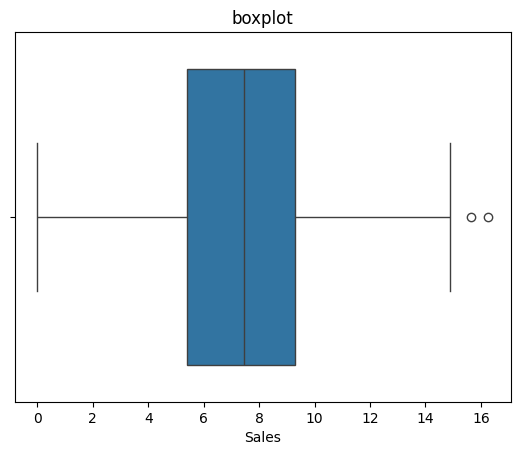

In [ ]:
sns.boxplot(data=df,x="Sales")
plt.title("boxplot")
plt.show()

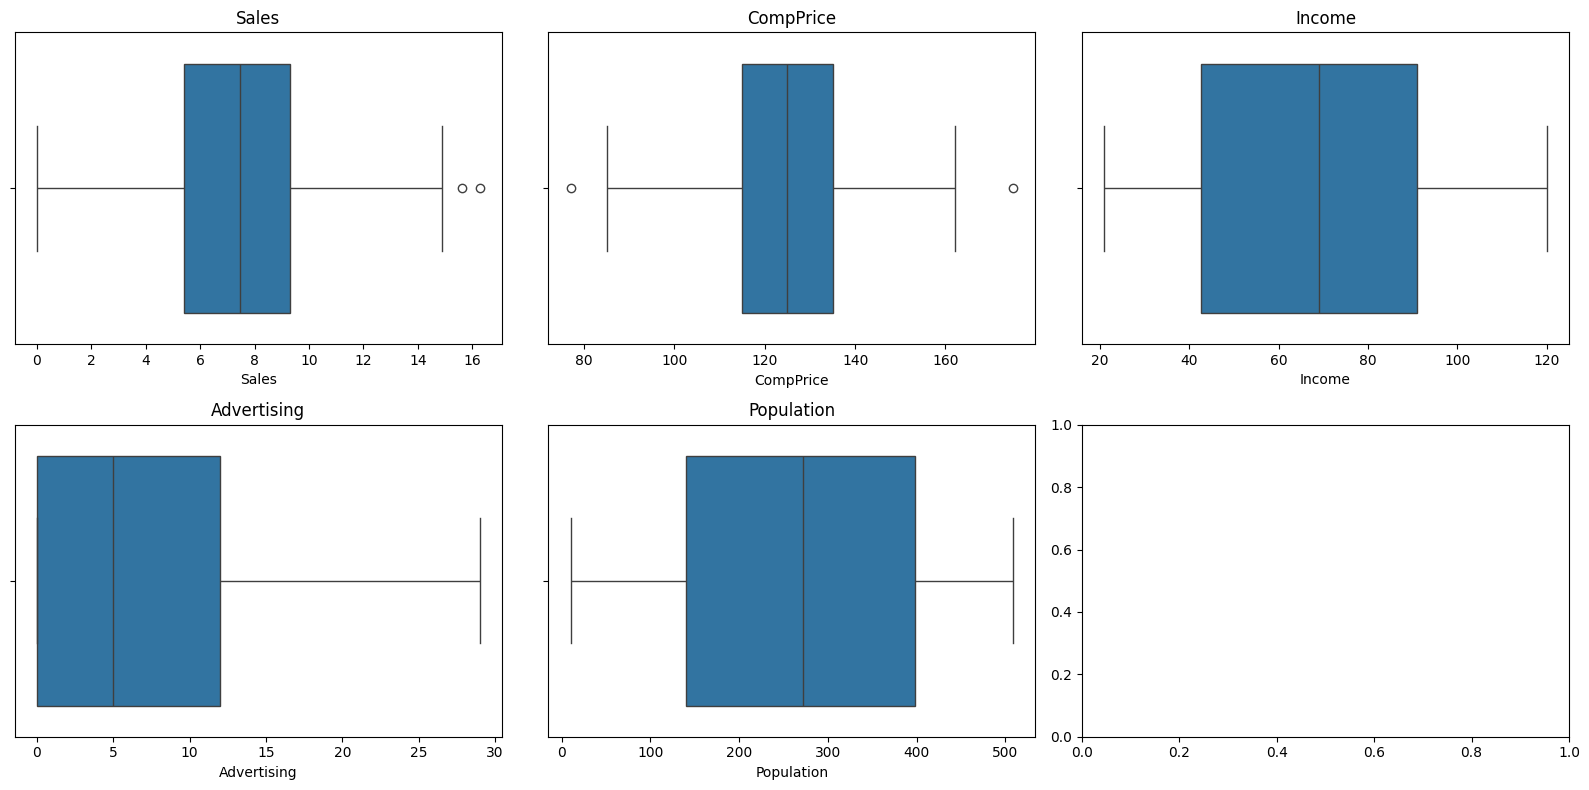

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Inter quartile range (75-25)%
# 25 first quartile
# 50 second quartile
# 75 third quartile

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from "Sales" column
df = remove_outliers_iqr(df, 'Sales')

# Remove outliers from "CompPrice" column
df = remove_outliers_iqr(df, 'CompPrice')

# feature engineering

In [ ]:
breaks= [0,5,10,15]
labels=["low","medium","high"]

In [ ]:
df["Sales_category"]=pd.cut(df["Sales"],bins=breaks,labels=labels,right=False)

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138.0,73.0,11.000000,276.0,120,Bad,42,17,Yes,Yes,medium
1,11.22,111.0,48.0,16.000000,260.0,83,Good,65,10,Yes,Yes,high
2,10.06,113.0,35.0,10.000000,269.0,80,Medium,59,12,Yes,Yes,high
3,7.40,117.0,100.0,4.000000,466.0,97,Medium,55,14,Yes,Yes,medium
4,4.15,141.0,64.0,6.611529,340.0,128,Bad,38,13,Yes,No,low


# Checking for the data imbalance

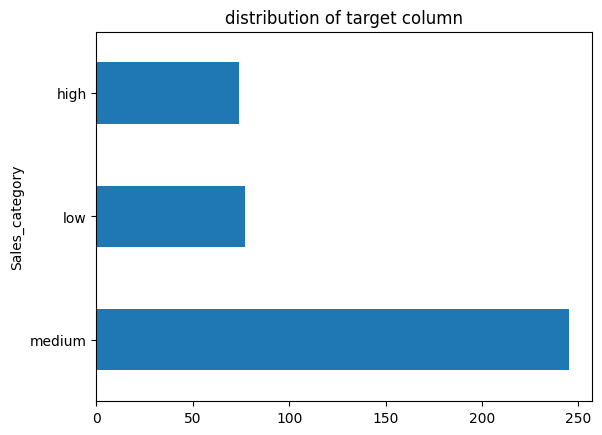

In [ ]:
df.Sales_category.value_counts().plot(kind="barh")
plt.title("distribution of target column")
plt.show()

* under sampling- remove the samples from the majority class
* over sampling- adding the samples to the minority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df.Sales_category.value_counts()

,count
Sales_category,
medium,245
low,77
high,74


In [ ]:
undersampler= RandomUnderSampler(random_state=42)

x_resampled,y_resampled= undersampler.fit_resample(df.drop('Sales_category',axis=1),
                                                   df['Sales_category'])

df_resampled= pd.concat([pd.DataFrame(x_resampled),pd.DataFrame({'Sales_category':y_resampled})],axis=1)

In [ ]:
df_resampled.Sales_category.value_counts()

,count
Sales_category,
low,74
medium,74
high,74


# Checking for the skewness

* values on the left hand sde- right skewed distribution
* values on the right hand sde- left skewed distribution
* values in the middle- normal distribution
* values are constant - uniform distribution

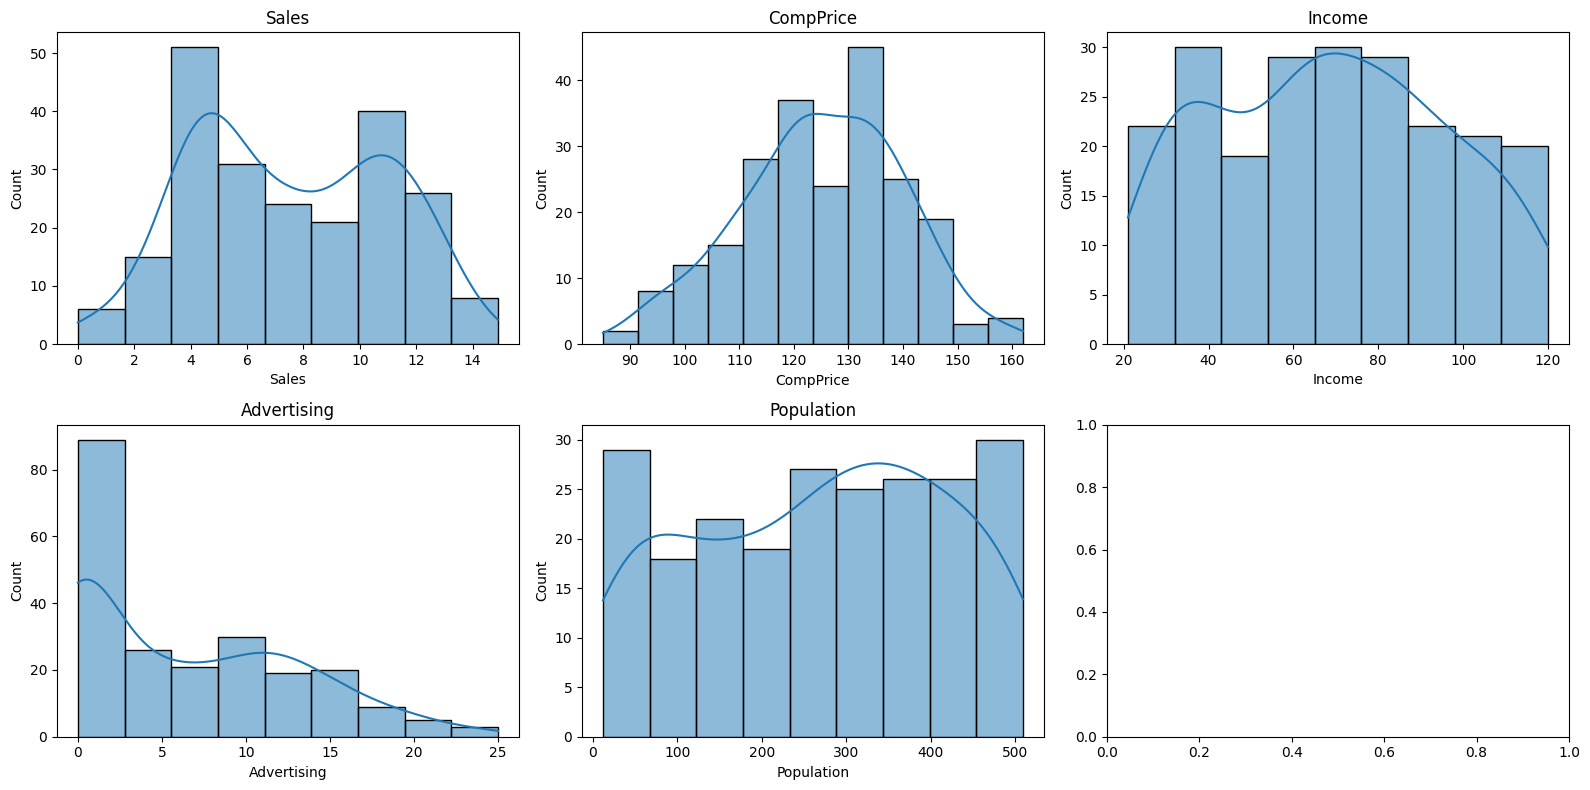

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,8))
axes=axes.flatten()

for i,j in enumerate(numerical_cols):
  sns.histplot(df_resampled[j],ax=axes[i],kde=True)
  axes[i].set_title(j)

plt.tight_layout()
plt.show()


In [ ]:
df_resampled["Sales_log"]=np.log1p(df_resampled["Sales"])

# Check for the correlation

* positive (year_experience vs salary)
* negative (supply and demand)
* zero

The values range in (-1,1)

In [ ]:
num_df=df_resampled.select_dtypes(include=['int','float'])

In [ ]:
cm=num_df.corr()
cm

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_log
Sales,1.000000,0.098096,0.227169,0.296287,0.032253,-0.515958,-0.287194,-0.074135,0.952489
CompPrice,0.098096,1.000000,-0.010283,-0.043688,-0.178905,0.522525,-0.114821,0.010679,0.103722
Income,0.227169,-0.010283,1.000000,0.152922,0.082905,-0.092915,-0.071333,-0.042502,0.218667
Advertising,0.296287,-0.043688,0.152922,1.000000,0.295493,-0.010246,-0.024713,-0.102701,0.277632
Population,0.032253,-0.178905,0.082905,0.295493,1.000000,-0.002186,-0.009089,-0.077985,0.057527
Price,-0.515958,0.522525,-0.092915,-0.010246,-0.002186,1.000000,-0.013410,0.020398,-0.516629
Age,-0.287194,-0.114821,-0.071333,-0.024713,-0.009089,-0.013410,1.000000,-0.005305,-0.257371
Education,-0.074135,0.010679,-0.042502,-0.102701,-0.077985,0.020398,-0.005305,1.000000,-0.087128
Sales_log,0.952489,0.103722,0.218667,0.277632,0.057527,-0.516629,-0.257371,-0.087128,1.000000


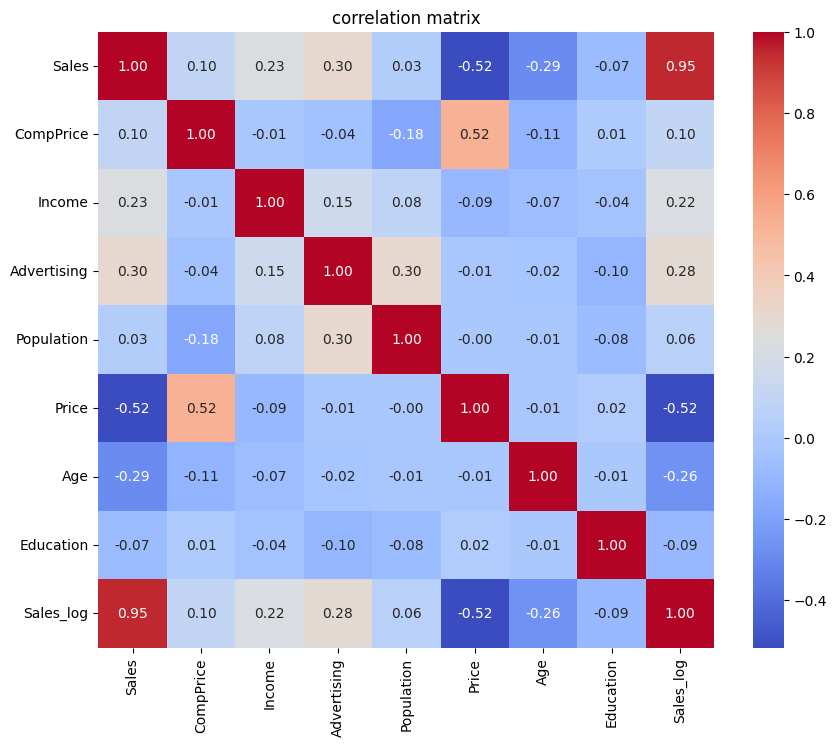

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(cm,annot=True,cmap="coolwarm",fmt=".2f",square=True)
plt.title("correlation matrix")
plt.show()

# Multicollinearity

In [ ]:
# Set the threshold
threshold = 0.7

# Find highly correlated column pairs
highly_correlated = np.where((cm > threshold) & (cm < 1))

# Print highly correlated column pairs
for i, j in zip(*highly_correlated):
    if i != j and i < j:  # Avoid printing duplicates and correlations of a variable with itself
        print(f"Columns '{num_df.columns[i]}' and '{num_df.columns[j]}' are highly correlated with correlation coefficient {cm.iloc[i, j]}")

Columns 'Sales' and 'Sales_log' are highly correlated with correlation coefficient 0.9524894604277238


In [ ]:
columns_to_drop = set()

# Iterate through highly correlated column pairs
for i, j in zip(*highly_correlated):
    if i != j and i < j:
        column_i = num_df.columns[i]
        column_j = num_df.columns[j]
        columns_to_drop.add(column_j)

# Drop the highly correlated columns from the DataFrame
df_resampled.drop(columns=columns_to_drop, inplace=True)

# Feature cardinality

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns


In [ ]:
cardinality = {col: df[col].nunique() for col in categorical_columns}


In [ ]:
print("Feature Cardinality:")
for feature, unique_count in cardinality.items():
    print(f"{feature}: {unique_count} unique values")

Feature Cardinality:
ShelveLoc: 3 unique values
Urban: 2 unique values
US: 2 unique values


# Label encoder

* red 0
* blue 1
* green 2

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object' or df[col_name].dtype == 'category' ):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138.0,73.0,11.000000,276.0,120,0,42,17,1,1,1
1,11.22,111.0,48.0,16.000000,260.0,83,1,65,10,1,1,2
2,10.06,113.0,35.0,10.000000,269.0,80,2,59,12,1,1,2
3,7.40,117.0,100.0,4.000000,466.0,97,2,55,14,1,1,1
4,4.15,141.0,64.0,6.611529,340.0,128,0,38,13,1,0,0


In [ ]:
df.to_csv("data_clean.csv")